<a href="https://colab.research.google.com/github/NamithaAnnesTom/Deep-Learning-Works/blob/main/RecurrentNeuralNetworks1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***GOOGLE STOCK ANALYSIS***

***IMPORTING LIBRARIES***

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense


Pandas: Used for handling and manipulating data in DataFrame format.
NumPy: Provides numerical operations and array manipulations.
Matplotlib: Used for plotting graphs and visualizations.
MinMaxScaler: Scales the data between 0 and 1, a common preprocessing step for neural networks.
TimeseriesGenerator: Helps generate batches of temporal data sequences for training recurrent neural networks.
Sequential, LSTM, Dense: Components from Keras for building and training neural networks.

***LOAD DATA***

In [3]:
df=pd.read_csv('/content/GOOG (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100
1,2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300
2,2022-08-10,119.589996,121.779999,119.360001,120.650002,120.650002,20497000
3,2022-08-11,122.080002,122.339996,119.550003,119.820000,119.820000,16671600
4,2022-08-12,121.160004,122.650002,120.400002,122.650002,122.650002,16121100
...,...,...,...,...,...,...,...
245,2023-07-31,133.009995,133.830002,132.130005,133.110001,133.110001,18381900
246,2023-08-01,130.854996,132.919998,130.750000,131.889999,131.889999,22154300
247,2023-08-02,129.839996,130.419998,127.849998,128.639999,128.639999,22705800
248,2023-08-03,128.369995,129.770004,127.775002,128.770004,128.770004,15018100


***DATA PREPROCESSING***

In the context of financial time series data, the "Date" and "Close" columns typically represent the date of a particular observation and the closing price of a financial instrument (such as a stock) on that date, respectively.

**Date Column:**

**Purpose:** The "Date" column records the date associated with each data point in the time series.
**Data Type:** Usually, the "Date" column is represented as a string or object data type when loaded into a DataFrame.
**Conversion:** Converting the "Date" column to a datetime data type is common. This allows for easier manipulation, sorting, and plotting of time series data. The pd.to_datetime() function in Pandas is used for this conversion.

**Close Column:**

**Purpose:** The "Close" column represents the closing price of a financial instrument (e.g., a stock) on a specific date.
**Data Type:** Typically, the "Close" column contains numerical values representing the closing prices.
**Significance:** Closing prices are essential in financial analysis and time series modeling, as they capture the final traded price of the day and are widely used in various financial calculations and predictions.

Now, regarding the line df['Date'] = pd.to_datetime(df['Date']), this line of code is performing the conversion of the "Date" column from a string/object data type to a datetime data type using the pd.to_datetime() function. This conversion is beneficial for several reasons:

**Date Sorting:**Converting the "Date" column to datetime ensures that the dates are sorted chronologically, which is crucial for time series analysis.

**Date Manipulation:** Datetime objects provide convenient methods for date manipulation, extraction of components (e.g., year, month, day), and arithmetic operations.

**Plotting:** Datetime data types are well-supported in plotting libraries, making it easier to visualize time series data in a meaningful way.

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')
data=df['Close'].values.reshape(-1,1)


**Convert 'Date' Column to Datetime:**

df['Date'] = pd.to_datetime(df['Date'])
**Purpose:** Converts the 'Date' column from a string/object data type to a datetime data type.
**Reason:** Ensures that the dates are treated as datetime objects rather than plain strings. This is crucial for proper sorting and handling of time-related data.

**Sort DataFrame by 'Date':**
df = df.sort_values('Date')
**Purpose: **Sorts the DataFrame based on the 'Date' column in ascending order.
**Reason:** Time series analysis often requires chronological order, and sorting ensures that the data is organized by date, making subsequent analyses and visualizations more meaningful.

**Extract and Reshape 'Close' Prices:**
data = df['Close'].values.reshape(-1, 1)
**Purpose:** Extracts the 'Close' prices from the DataFrame and reshapes the array to have a single column.
**Reason:** Many machine learning models, including neural networks like LSTM, expect input data in a specific format. Reshaping to (-1, 1) is common when dealing with univariate time series data (single feature, in this case, the closing prices).

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100
1,2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300
2,2022-08-10,119.589996,121.779999,119.360001,120.650002,120.650002,20497000
3,2022-08-11,122.080002,122.339996,119.550003,119.820000,119.820000,16671600
4,2022-08-12,121.160004,122.650002,120.400002,122.650002,122.650002,16121100
...,...,...,...,...,...,...,...
245,2023-07-31,133.009995,133.830002,132.130005,133.110001,133.110001,18381900
246,2023-08-01,130.854996,132.919998,130.750000,131.889999,131.889999,22154300
247,2023-08-02,129.839996,130.419998,127.849998,128.639999,128.639999,22705800
248,2023-08-03,128.369995,129.770004,127.775002,128.770004,128.770004,15018100


In [7]:
data

array([[118.139999],
       [117.5     ],
       [120.650002],
       [119.82    ],
       [122.650002],
       [122.879997],
       [122.510002],
       [120.32    ],
       [120.860001],
       [118.120003],
       [115.07    ],
       [114.769997],
       [114.699997],
       [117.699997],
       [111.300003],
       [110.339996],
       [109.910004],
       [109.150002],
       [110.550003],
       [108.68    ],
       [107.480003],
       [110.480003],
       [109.419998],
       [111.779999],
       [111.870003],
       [105.309998],
       [105.870003],
       [103.900002],
       [103.629997],
       [103.849998],
       [101.830002],
       [100.010002],
       [100.57    ],
       [ 99.169998],
       [ 98.809998],
       [ 98.089996],
       [100.739998],
       [ 98.089996],
       [ 96.150002],
       [ 99.300003],
       [102.410004],
       [102.220001],
       [102.239998],
       [ 99.57    ],
       [ 98.709999],
       [ 98.050003],
       [ 98.300003],
       [ 99.7

***NORMALIZATION***

In [8]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(data)

Use Min-Max scaling to normalize the 'Close' prices between 0 and 1.

***DEFINING SEQUENCE LENGTH AND SPLITTING DATA***

In [9]:
sequence_length=10
train_size=int(len(data_scaled)*0.8)
train_size

200

In [10]:
train_data,test_data=data_scaled[:train_size],data_scaled[train_size:]

**sequence_length = 10:**
**Purpose:** Defines the length of sequences used for training the LSTM model.
**Explanation:** In time series analysis, it's common to use a sequence of past data points to predict the next data point. This parameter (sequence_length) determines how many past data points the model considers for each prediction. In this case, the model will consider the previous 10 closing prices to predict the next one.

train_size = int(len(data_scaled) * 0.8): **bold text**
**Purpose:** Determines the size of the training set.
**Explanation:**
len(data_scaled): Returns the total number of data points in the scaled dataset.
0.8: Represents the proportion of the data used for training (80%).
int(...): Converts the result to an integer, ensuring it's a whole number.
The result is the index up to which the training set extends.

**train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]:**
**Purpose:** Splits the scaled data into training and testing sets.
**Explanation:**
data_scaled[:train_size]: Retrieves the portion of data_scaled from the beginning up to train_size. This is the training set.
data_scaled[train_size:]: Retrieves the portion of data_scaled from train_size onwards. This is the testing set.
In summary, these lines set up the parameters for training the LSTM model

***TIMESERIESGENERATOR***

In [11]:
train_generator=TimeseriesGenerator(train_data,train_data,length=sequence_length,batch_size=1)


In [12]:
test_generator=TimeseriesGenerator(test_data,test_data,length=sequence_length,batch_size=1)

The TimeseriesGenerator in Keras is a utility class that helps create batches of temporal sequences for training recurrent neural networks, such as LSTM (Long Short-Term Memory) networks. Let's break down its purpose and the reasons for using it:

**Purpose:**
The primary purpose of the TimeseriesGenerator is to prepare the input-output pairs (X, y) for training a recurrent neural network on time series data.
It automates the process of creating sequences from the original time series data, making it easier to feed the data into the network in batches during training.

**Parameters:**
**data:** The input time series data (e.g., closing prices).
**targets:** The target time series data (e.g., same as input data for predicting the next value).
**length:** The length of the output sequences (number of time steps to consider for each prediction).
**batch_size:** The number of samples in each batch.

**Reasons for Using TimeseriesGenerator:**
Sequence Creation:

Time series data is often converted into sequences of a fixed length for training recurrent neural networks. For example, if predicting the next value based on the previous 10 values, each sequence has a length of 10.
The TimeseriesGenerator simplifies the creation of these sequences from the original time series data.
Batching:

Training a neural network with large datasets is computationally expensive. Batching involves training the network on smaller subsets (batches) of the data.
The TimeseriesGenerator automates the creation of batches, ensuring that each batch consists of input-output pairs derived from sequential segments of the time series data.
Efficiency:

When working with large datasets, it's not practical to load the entire dataset into memory. The generator generates batches on-the-fly, allowing for efficient training even with large datasets.
Compatibility with RNNs:

Recurrent neural networks, such as LSTM networks, require input data in a specific format. The TimeseriesGenerator helps format the data correctly for training RNNs.
Handling Temporal Dependencies:

The generator takes care of handling the temporal dependencies in the time series data. It ensures that the input sequences are properly aligned with their corresponding target sequences.
Convenience:

The generator abstracts away much of the manual work involved in preparing time series data for training, making the code more concise and readable.

***LSTM MODEL CREATION***

In [13]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',input_shape=(sequence_length,1)))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mse')


LSTM Model: Build a sequential model with an LSTM layer having 50 units and a ReLU activation function. The input shape is determined by the sequence length and the number of features (1 in this case). Add a Dense layer for the output.
Compilation: Compile the model using the Adam optimizer and mean squared error (MSE) loss.

***MODEL TRAINING AND EVALUATION***

In [14]:
model.fit(train_generator,epochs=50)
test_loss=model.evaluate(test_generator)

Epoch 1/50
190/190 [==============================] - 3s 5ms/step - loss: 0.0217
Epoch 2/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0073
Epoch 3/50
190/190 [==============================] - 1s 7ms/step - loss: 0.0069
Epoch 4/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0063
Epoch 5/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0050
Epoch 6/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0048
Epoch 7/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0046
Epoch 8/50
190/190 [==============================] - 1s 5ms/step - loss: 0.0044
Epoch 9/50
190/190 [==============================] - 2s 10ms/step - loss: 0.0043
Epoch 10/50
190/190 [==============================] - 2s 8ms/step - loss: 0.0039
Epoch 11/50
190/190 [==============================] - 1s 6ms/step - loss: 0.0040
Epoch 12/50
190/190 [==============================] - 1s 6ms/step - loss: 0.0037
Epoch 13/50
190/190 [===

Model Training: Train the model using the training generator for 50 epochs.

Model Evaluation: Evaluate the model on the test data using the testing generator.

**PREDICTION**

In [15]:
predictions=model.predict(test_generator)

40/40 [==============================] - 0s 3ms/step


Predictions: Use the trained model to make predictions on the test data.

***DENORMALIZING PREDICTED AND ACTUAL VALUES***

In [16]:
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(test_data[sequence_length:])


Denormalization: Reverse the Min-Max scaling to obtain the denormalized predictions and actual values.

**PLOTTING THE RESULTS**

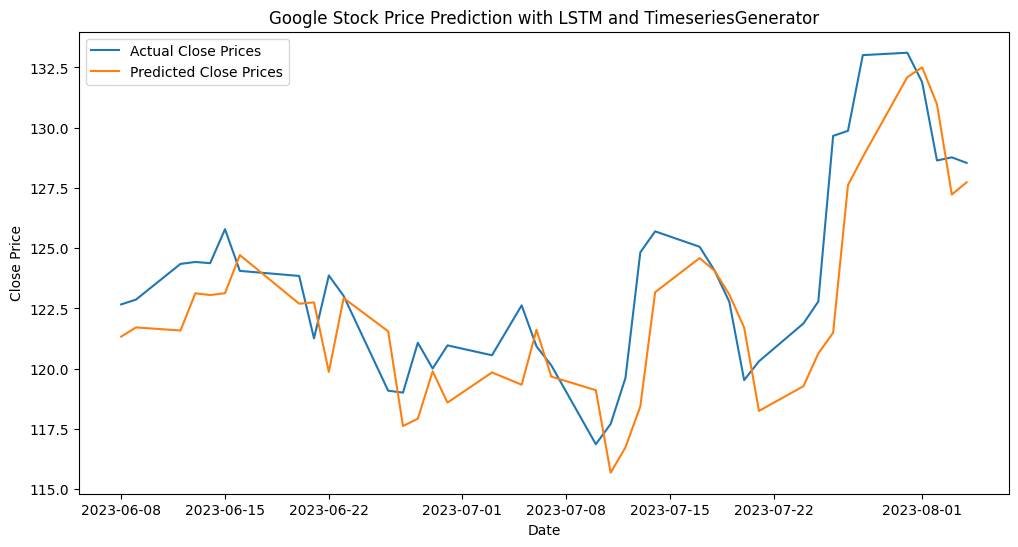

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[train_size + sequence_length:], actual_values, label='Actual Close Prices')
plt.plot(df['Date'].iloc[train_size + sequence_length:], predictions, label='Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google Stock Price Prediction with LSTM and TimeseriesGenerator')
plt.legend()
plt.show()
